In [1]:
#Split location-only results by MA and cone angle.

In [45]:
import pandas as pd
import numpy as np
import datetime as dt
import glob

from XMA_finder import XMA_finder
from histo_plot_lower_vmax import histo_plot
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

#import modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
import matplotlib
from merka05_surface_eq_array_GIPM import merka05_surface_eq_array_GIPM

In [46]:
#open OMNI *average* CSVs
list_all = []

path = "/Users/apx059/Documents/2001and2003/**"

for path in glob.glob(path, recursive=True):
    list_all.append(path)
    
#list with only files, not folders
om_csvs = []

for element in list_all:
    if '.csv' and 'OMNI' in element:
        om_csvs.append(element)
        
om_dfs = []

for element in om_csvs:
    om = pd.read_csv(element)
    om_dfs.append(om)
    
omni_all = pd.concat(om_dfs)
omni_all['datetime'] = pd.to_datetime(omni_all['datetime'],format='mixed')

omni_all = omni_all.set_index('datetime')

for element in om_dfs:
    element['datetime'] = pd.to_datetime(element['datetime'])
    element = element.set_index('datetime', inplace = True)

XMA_all = XMA_finder(omni_all)

/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_50380/2451725765.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  element['datetime'] = pd.to_datetime(element['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_50380/2451725765.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  element['datetime'] = pd.to_datetime(element['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_50380/2451725765.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  element['datetime'] = pd.to_datetime(element['datetime'])
/var/folders/1k/d29

In [47]:
##load Cluster CSVs

list_all = []

path = "/Users/apx059/Documents/2001and2003/**"

for path in glob.glob(path, recursive=True):
    list_all.append(path)
    
#list with only files, not folders
cl_file_list = []

for element in list_all:
    if '.csv' in element:
        if not 'OMNI' in element:
            cl_file_list.append(element)

cl_dfs = []

for file in cl_file_list:
    df = pd.read_csv(file,encoding='utf-8')
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace = True)
    cl_dfs.append(df)

/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_50380/1934760380.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_50380/1934760380.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_50380/1934760380.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/

In [48]:
#make new dataframes split by 1. cone angle and 2. MA
cl_all = pd.concat(cl_dfs)

df_radial = cl_all.loc[(cl_all['cone angle'] < 30) & (cl_all['GIPM X'].notnull())]
df_spiral = cl_all.loc[(cl_all['cone angle'] > 30) & (cl_all['cone angle'] < 60) & (cl_all['GIPM X'].notnull())]
df_perpendicular = cl_all.loc[(cl_all['cone angle'] > 60) & (cl_all['GIPM X'].notnull())]

In [38]:
df_radial.describe()

,GIPM X,GIPM Y,GIPM Z,B min,B mean,B max,cone angle,M_A
count,789573.000000,789573.000000,789573.000000,789573.000000,789573.000000,789573.000000,789573.000000,789573.000000
mean,7.571066,-0.182791,-0.124049,2.666649,3.727794,4.863186,21.630563,10.491277
std,4.619165,8.273251,8.216431,4.247164,4.111171,4.338232,6.130686,4.837213
min,0.000003,-22.950938,-23.006283,0.001255,0.063796,0.153715,0.000000,1.242857
25%,3.684670,-7.057010,-6.914118,0.558750,1.095297,1.464114,17.590375,7.800000
50%,7.254111,-0.304525,-0.273947,0.886327,2.522975,3.981470,22.824073,9.750000
75%,11.242793,6.673258,6.685951,2.585815,4.259277,6.555695,26.709079,11.966667
max,25.261687,22.470602,22.271520,204.876396,206.388487,207.682577,29.999995,172.920000


In [39]:
df_spiral.describe()

,GIPM X,GIPM Y,GIPM Z,B min,B mean,B max,cone angle,M_A
count,2.764834e+06,2.764834e+06,2.764834e+06,2.764834e+06,2.764834e+06,2.764834e+06,2.764834e+06,2.764834e+06
mean,7.751187e+00,-9.990797e-02,-7.993437e-01,2.589586e+00,3.495037e+00,4.447538e+00,4.621676e+01,1.019732e+01
std,4.752649e+00,8.776697e+00,8.173019e+00,3.843310e+00,3.822907e+00,5.746225e+00,8.464675e+00,5.299164e+00
min,8.121227e-07,-2.381255e+01,-2.406853e+01,1.707317e-03,1.027790e-01,2.008481e-01,3.000000e+01,4.000000e-01
25%,3.729746e+00,-7.377582e+00,-7.508655e+00,7.466463e-01,1.036623e+00,1.231099e+00,3.920411e+01,7.237500e+00
50%,7.364640e+00,-2.193303e-01,-1.272708e+00,9.690224e-01,2.652478e+00,3.688743e+00,4.675733e+01,9.290000e+00
75%,1.146001e+01,7.164264e+00,5.996212e+00,2.734820e+00,4.019235e+00,5.940523e+00,5.353709e+01,1.182000e+01
max,2.519873e+01,2.421472e+01,2.481347e+01,2.093864e+02,2.114069e+02,2.687743e+03,6.000000e+01,1.814800e+02


In [40]:
df_perpendicular.describe()

,GIPM X,GIPM Y,GIPM Z,B min,B mean,B max,cone angle,M_A
count,2.886627e+06,2.886627e+06,2.886627e+06,2.886627e+06,2.886627e+06,2.886627e+06,2.886627e+06,2.886627e+06
mean,7.799705e+00,-2.952627e-02,-7.183473e-01,2.759330e+00,3.543022e+00,4.359027e+00,7.348479e+01,1.049972e+01
std,4.799312e+00,9.121142e+00,8.233365e+00,3.778455e+00,3.845499e+00,6.578194e+00,7.919779e+00,5.995558e+00
min,9.646006e-07,-2.595585e+01,-2.689942e+01,1.037614e-03,1.167091e-01,2.268927e-01,6.000000e+01,5.000000e-01
25%,3.712995e+00,-7.584298e+00,-7.508912e+00,8.834118e-01,1.014218e+00,1.121969e+00,6.665974e+01,7.275000e+00
50%,7.398246e+00,-3.077663e-02,-1.195608e+00,1.341810e+00,2.927678e+00,3.693867e+00,7.334775e+01,9.433333e+00
75%,1.153841e+01,7.509533e+00,6.203489e+00,2.951804e+00,4.149347e+00,5.762917e+00,8.014007e+01,1.216250e+01
max,2.495424e+01,2.577466e+01,2.679578e+01,2.321060e+02,2.331286e+02,4.573349e+03,9.000000e+01,2.701250e+02


In [6]:
#now break up by MA. Ma ranges <7, 7-15, >15

#radial
df_rad_less7 = df_radial.loc[(df_radial['M_A'] < 7)]
df_rad_7_15 = df_radial.loc[(df_radial['M_A'] >= 7) & (df_radial['M_A'] < 15)]
df_rad_15more = df_radial.loc[(df_radial['M_A'] >= 15)]

#spiral 

df_spir_less7 = df_spiral.loc[(df_spiral['M_A'] < 7)]
df_spir_7_15 = df_spiral.loc[(df_spiral['M_A'] >= 7) & (df_spiral['M_A'] < 15)]
df_spir_15more = df_spiral.loc[(df_spiral['M_A'] >= 15)]

#perpendicular

df_perp_less7 = df_perpendicular.loc[(df_perpendicular['M_A'] < 7)]
df_perp_7_15 = df_perpendicular.loc[(df_perpendicular['M_A'] >= 7) & (df_perpendicular['M_A'] < 15)]
df_perp_15more = df_perpendicular.loc[(df_perpendicular['M_A'] >= 15)]

In [7]:
#now break up by MA. MA ranges <5, 5-10, 10-15, 15-20, >20

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]
df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]
df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

#radial
df_rad_less5 = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] < 5)]
df_rad_5_10 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 5) & (df_rad_lowZ['M_A'] < 10))]
df_rad_10_15 = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] >= 10) & (df_rad_lowZ['M_A'] < 15)]
df_rad_15_20 = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] >= 15) & (df_rad_lowZ['M_A'] < 20)]
df_rad_20more = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] >= 20)]

#spiral 

df_spir_less5 = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] < 5)]
df_spir_5_10 = df_spir_lowZ.loc[((df_spir_lowZ['M_A'] >= 5) & df_spir_lowZ['M_A'] < 10)]
df_spir_10_15 = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] >= 10) & (df_spir_lowZ['M_A'] < 15)]
df_spir_15_20 = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] >= 15) & (df_spir_lowZ['M_A'] < 20)]
df_spir_20more = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] >= 20)]

#perpendicular

df_perp_less5 = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] < 5)]
df_perp_5_10 = df_perp_lowZ.loc[((df_perp_lowZ['M_A'] >= 5) & (df_perp_lowZ['M_A'] < 10))]
df_perp_10_15 = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] >= 10) & (df_perp_lowZ['M_A'] < 15)]
df_perp_15_20 = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] >= 15) & (df_perp_lowZ['M_A'] < 20)]
df_perp_20more = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] >= 20)]

#break up into radial, 
#reference all X, Y, and Z

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]

x_locs_rad = df_rad_lowZ['GIPM X'].to_numpy()
y_locs_rad = df_rad_lowZ['GIPM Y'].to_numpy()
z_locs_rad = df_rad_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_rad, xedg, yedg = np.histogram2d(x_locs_rad, y_locs_rad, bins=[x_bin_edges, y_bin_edges])
HistXY_rad = HistXY_rad.T

z_bin_edges = range(-30,30)
HistXZ_rad, xedg, zedg = np.histogram2d(x_locs_rad, z_locs_rad, bins=[x_bin_edges, z_bin_edges])
HistXZ_rad = HistXZ_rad.T

HistXY_rad[HistXY_rad == 0] = np.nan
HistXZ_rad[HistXZ_rad == 0] = np.nan

#########spiral 
#reference all X, Y, and Z

df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]

x_locs_spir = df_spir_lowZ['GIPM X'].to_numpy()
y_locs_spir = df_spir_lowZ['GIPM Y'].to_numpy()
z_locs_spir = df_spir_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers

HistXY_spir, xedg, yedg = np.histogram2d(x_locs_spir, y_locs_spir, bins=[x_bin_edges, y_bin_edges])
HistXY_spir = HistXY_spir.T

z_bin_edges = range(-30,30)
HistXZ_spir, xedg, zedg = np.histogram2d(x_locs_spir, z_locs_spir, bins=[x_bin_edges, z_bin_edges])
HistXZ_spir = HistXZ_spir.T

HistXY_spir[HistXY_spir == 0] = np.nan
HistXZ_spir[HistXZ_spir == 0] = np.nan

################perpendicular 
#reference all X, Y, and Z

df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

x_locs_perp = df_perp_lowZ['GIPM X'].to_numpy()
y_locs_perp = df_perp_lowZ['GIPM Y'].to_numpy()
z_locs_perp = df_perp_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_perp, xedg, yedg = np.histogram2d(x_locs_perp, y_locs_perp, bins=[x_bin_edges, y_bin_edges])
HistXY_perp = HistXY_perp.T

z_bin_edges = range(-30,30)
HistXZ_perp, xedg, zedg = np.histogram2d(x_locs_perp, z_locs_perp, bins=[x_bin_edges, z_bin_edges])
HistXZ_perp = HistXZ_perp.T

HistXY_perp[HistXY_perp == 0] = np.nan
HistXZ_perp[HistXZ_perp == 0] = np.nan

In [8]:
#now break up by MA, lowZ. MA ranges <7, 7-15, >15

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]
df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]
df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

#radial
df_rad_less7 = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] < 7)]
df_rad_7_15 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 7) & (df_rad_lowZ['M_A'] < 15))]
df_rad_15more = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] >= 15)]

#spiral 

df_spir_less7 = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] < 7)]
df_spir_7_15 = df_spir_lowZ.loc[((df_spir_lowZ['M_A'] >= 7) & df_spir_lowZ['M_A'] < 15)]
df_spir_15more = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] >= 15)]

#perpendicular

df_perp_less7 = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] < 7)]
df_perp_7_15 = df_perp_lowZ.loc[((df_perp_lowZ['M_A'] >= 7) & (df_perp_lowZ['M_A'] < 15))]
df_perp_15more = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] >= 15)]

#break up into radial, 
#reference all X, Y, and Z

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]

x_locs_rad = df_rad_lowZ['GIPM X'].to_numpy()
y_locs_rad = df_rad_lowZ['GIPM Y'].to_numpy()
z_locs_rad = df_rad_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_rad, xedg, yedg = np.histogram2d(x_locs_rad, y_locs_rad, bins=[x_bin_edges, y_bin_edges])
HistXY_rad = HistXY_rad.T

z_bin_edges = range(-30,30)
HistXZ_rad, xedg, zedg = np.histogram2d(x_locs_rad, z_locs_rad, bins=[x_bin_edges, z_bin_edges])
HistXZ_rad = HistXZ_rad.T

HistXY_rad[HistXY_rad == 0] = np.nan
HistXZ_rad[HistXZ_rad == 0] = np.nan

#########spiral 
#reference all X, Y, and Z

df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]

x_locs_spir = df_spir_lowZ['GIPM X'].to_numpy()
y_locs_spir = df_spir_lowZ['GIPM Y'].to_numpy()
z_locs_spir = df_spir_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers

HistXY_spir, xedg, yedg = np.histogram2d(x_locs_spir, y_locs_spir, bins=[x_bin_edges, y_bin_edges])
HistXY_spir = HistXY_spir.T

z_bin_edges = range(-30,30)
HistXZ_spir, xedg, zedg = np.histogram2d(x_locs_spir, z_locs_spir, bins=[x_bin_edges, z_bin_edges])
HistXZ_spir = HistXZ_spir.T

HistXY_spir[HistXY_spir == 0] = np.nan
HistXZ_spir[HistXZ_spir == 0] = np.nan

################perpendicular 
#reference all X, Y, and Z

df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

x_locs_perp = df_perp_lowZ['GIPM X'].to_numpy()
y_locs_perp = df_perp_lowZ['GIPM Y'].to_numpy()
z_locs_perp = df_perp_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_perp, xedg, yedg = np.histogram2d(x_locs_perp, y_locs_perp, bins=[x_bin_edges, y_bin_edges])
HistXY_perp = HistXY_perp.T

z_bin_edges = range(-30,30)
HistXZ_perp, xedg, zedg = np.histogram2d(x_locs_perp, z_locs_perp, bins=[x_bin_edges, z_bin_edges])
HistXZ_perp = HistXZ_perp.T

HistXY_perp[HistXY_perp == 0] = np.nan
HistXZ_perp[HistXZ_perp == 0] = np.nan

In [9]:
#finer binned hists
x_bin_edges = range(30)
y_bin_edges = range(-30,30)

#########RADIAL######

###BELOW 5MA

x_locs_rad_less5 = df_rad_less5['GIPM X'].to_numpy()
y_locs_rad_less5 = df_rad_less5['GIPM Y'].to_numpy()

HistXY_rad_less5, xedg, yedg = np.histogram2d(x_locs_rad_less5, y_locs_rad_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_less5 = HistXY_rad_less5.T

###5-10 MA

x_locs_rad_5_10 = df_rad_5_10['GIPM X'].to_numpy()
y_locs_rad_5_10 = df_rad_5_10['GIPM Y'].to_numpy()

HistXY_rad_5_10, xedg, zedg = np.histogram2d(x_locs_rad_5_10, y_locs_rad_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_5_10 = HistXY_rad_5_10.T

###10-15MA

x_locs_rad_10_15 = df_rad_10_15['GIPM X'].to_numpy()
y_locs_rad_10_15 = df_rad_10_15['GIPM Y'].to_numpy()

HistXY_rad_10_15, xedg, yedg = np.histogram2d(x_locs_rad_10_15, y_locs_rad_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_10_15 = HistXY_rad_10_15.T

###15-20MA

x_locs_rad_15_20 = df_rad_15_20['GIPM X'].to_numpy()
y_locs_rad_15_20 = df_rad_15_20['GIPM Y'].to_numpy()

HistXY_rad_15_20, xedg, zedg = np.histogram2d(x_locs_rad_15_20, y_locs_rad_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_rad_15_20 = HistXY_rad_15_20.T

###OVER 20MA

x_locs_rad_20more = df_rad_20more['GIPM X'].to_numpy()
y_locs_rad_20more= df_rad_20more['GIPM Y'].to_numpy()

HistXY_rad_20more, xedg, yedg = np.histogram2d(x_locs_rad_20more, y_locs_rad_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_20more = HistXY_rad_20more.T

HistXY_rad_less5[HistXY_rad_less5 == 0] = np.nan
HistXY_rad_5_10[HistXY_rad_5_10 == 0] = np.nan
HistXY_rad_10_15[HistXY_rad_10_15 == 0] = np.nan
HistXY_rad_15_20[HistXY_rad_15_20 == 0] = np.nan
HistXY_rad_20more[HistXY_rad_20more == 0] = np.nan

#########SPIRAL######

###BELOW 5MA

x_locs_spir_less5 = df_spir_less5['GIPM X'].to_numpy()
y_locs_spir_less5 = df_spir_less5['GIPM Y'].to_numpy()

HistXY_spir_less5, xedg, yedg = np.histogram2d(x_locs_spir_less5, y_locs_spir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_less5 = HistXY_spir_less5.T

###5-10 MA

x_locs_spir_5_10 = df_spir_5_10['GIPM X'].to_numpy()
y_locs_spir_5_10 = df_spir_5_10['GIPM Y'].to_numpy()

HistXY_spir_5_10, xedg, zedg = np.histogram2d(x_locs_spir_5_10, y_locs_spir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_5_10 = HistXY_spir_5_10.T

###10-15MA

x_locs_spir_10_15 = df_spir_10_15['GIPM X'].to_numpy()
y_locs_spir_10_15 = df_spir_10_15['GIPM Y'].to_numpy()

HistXY_spir_10_15, xedg, yedg = np.histogram2d(x_locs_spir_10_15, y_locs_spir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_10_15 = HistXY_spir_10_15.T

###15-20MA
x_locs_spir_15_20 = df_spir_15_20['GIPM X'].to_numpy()
y_locs_spir_15_20 = df_spir_15_20['GIPM Y'].to_numpy()

HistXY_spir_15_20, xedg, zedg = np.histogram2d(x_locs_spir_15_20, y_locs_spir_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_spir_15_20 = HistXY_spir_15_20.T

###OVER 20MA
x_locs_spir_20more = df_spir_20more['GIPM X'].to_numpy()
y_locs_spir_20more = df_spir_20more['GIPM Y'].to_numpy()

HistXY_spir_20more, xedg, yedg = np.histogram2d(x_locs_spir_20more, y_locs_spir_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_20more = HistXY_spir_20more.T

HistXY_spir_less5[HistXY_spir_less5 == 0] = np.nan
HistXY_spir_5_10[HistXY_spir_5_10 == 0] = np.nan
HistXY_spir_10_15[HistXY_spir_10_15 == 0] = np.nan
HistXY_spir_15_20[HistXY_spir_15_20 == 0] = np.nan
HistXY_spir_20more[HistXY_spir_20more == 0] = np.nan

#####PERPENDICULAR

###BELOW 5MA

x_locs_perp_less5 = df_perp_less5['GIPM X'].to_numpy()
y_locs_perp_less5 = df_perp_less5['GIPM Y'].to_numpy()

HistXY_perp_less5, xedg, yedg = np.histogram2d(x_locs_perp_less5, y_locs_perp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_less5 = HistXY_perp_less5.T

###5-10 MA

x_locs_perp_5_10 = df_perp_5_10['GIPM X'].to_numpy()
y_locs_perp_5_10 = df_perp_5_10['GIPM Y'].to_numpy()

HistXY_perp_5_10, xedg, zedg = np.histogram2d(x_locs_perp_5_10, y_locs_perp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_5_10 = HistXY_perp_5_10.T

###10-15MA

x_locs_perp_10_15 = df_perp_10_15['GIPM X'].to_numpy()
y_locs_perp_10_15 = df_perp_10_15['GIPM Y'].to_numpy()

HistXY_perp_10_15, xedg, yedg = np.histogram2d(x_locs_perp_10_15, y_locs_perp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_10_15 = HistXY_perp_10_15.T

###15-20MA
x_locs_perp_15_20 = df_perp_15_20['GIPM X'].to_numpy()
y_locs_perp_15_20 = df_perp_15_20['GIPM Y'].to_numpy()

HistXY_perp_15_20, xedg, zedg = np.histogram2d(x_locs_perp_15_20, y_locs_perp_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_perp_15_20 = HistXY_perp_15_20.T

###OVER 20MA
x_locs_perp_20more = df_perp_20more['GIPM X'].to_numpy()
y_locs_perp_20more = df_perp_20more['GIPM Y'].to_numpy()

HistXY_perp_20more, xedg, yedg = np.histogram2d(x_locs_perp_20more, y_locs_perp_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_20more = HistXY_perp_20more.T

HistXY_perp_less5[HistXY_perp_less5 == 0] = np.nan
HistXY_perp_5_10[HistXY_perp_5_10 == 0] = np.nan
HistXY_perp_10_15[HistXY_perp_10_15 == 0] = np.nan
HistXY_perp_15_20[HistXY_perp_15_20 == 0] = np.nan
HistXY_perp_20more[HistXY_perp_20more == 0] = np.nan




In [26]:
#finer binned hists
x_bin_edges = range(30)
y_bin_edges = range(-30,30)

#########RADIAL######

###BELOW 7MA

x_locs_rad_less7 = df_rad_less7['GIPM X'].to_numpy()
y_locs_rad_less7 = df_rad_less7['GIPM Y'].to_numpy()

HistXY_rad_less7, xedg, yedg = np.histogram2d(x_locs_rad_less7, y_locs_rad_less7, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_less7 = HistXY_rad_less7.T

###7-15 MA

x_locs_rad_7_15 = df_rad_7_15['GIPM X'].to_numpy()
y_locs_rad_7_15 = df_rad_7_15['GIPM Y'].to_numpy()

HistXY_rad_7_15, xedg, zedg = np.histogram2d(x_locs_rad_7_15, y_locs_rad_7_15, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_7_15 = HistXY_rad_7_15.T

###OVER 15MA

x_locs_rad_15more = df_rad_15more['GIPM X'].to_numpy()
y_locs_rad_15more= df_rad_15more['GIPM Y'].to_numpy()

HistXY_rad_15more, xedg, yedg = np.histogram2d(x_locs_rad_15more, y_locs_rad_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_15more = HistXY_rad_15more.T

HistXY_rad_less7[HistXY_rad_less7 == 0] = np.nan
HistXY_rad_7_15[HistXY_rad_7_15 == 0] = np.nan
HistXY_rad_15more[HistXY_rad_15more == 0] = np.nan

#########SPIRAL######

###BELOW 7MA

x_locs_spir_less7 = df_spir_less7['GIPM X'].to_numpy()
y_locs_spir_less7 = df_spir_less7['GIPM Y'].to_numpy()

HistXY_spir_less7, xedg, yedg = np.histogram2d(x_locs_spir_less7, y_locs_spir_less7, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_less7 = HistXY_spir_less7.T

###7-15 MA

x_locs_spir_7_15 = df_spir_7_15['GIPM X'].to_numpy()
y_locs_spir_7_15 = df_spir_7_15['GIPM Y'].to_numpy()

HistXY_spir_7_15, xedg, zedg = np.histogram2d(x_locs_spir_7_15, y_locs_spir_7_15, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_7_15 = HistXY_spir_7_15.T

###OVER 15MA
x_locs_spir_15more = df_spir_15more['GIPM X'].to_numpy()
y_locs_spir_15more = df_spir_15more['GIPM Y'].to_numpy()

HistXY_spir_15more, xedg, yedg = np.histogram2d(x_locs_spir_15more, y_locs_spir_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_15more = HistXY_spir_15more.T

HistXY_spir_less7[HistXY_spir_less7 == 0] = np.nan
HistXY_spir_7_15[HistXY_spir_7_15 == 0] = np.nan
HistXY_spir_15more[HistXY_spir_15more == 0] = np.nan

#####PERPENDICULAR

###BELOW 7MA

x_locs_perp_less7 = df_perp_less7['GIPM X'].to_numpy()
y_locs_perp_less7 = df_perp_less7['GIPM Y'].to_numpy()

HistXY_perp_less7, xedg, yedg = np.histogram2d(x_locs_perp_less7, y_locs_perp_less7, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_less7 = HistXY_perp_less7.T

###7-15 MA

x_locs_perp_7_15 = df_perp_7_15['GIPM X'].to_numpy()
y_locs_perp_7_15 = df_perp_7_15['GIPM Y'].to_numpy()

HistXY_perp_7_15, xedg, zedg = np.histogram2d(x_locs_perp_7_15, y_locs_perp_7_15, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_7_15 = HistXY_perp_7_15.T

###OVER 15MA
x_locs_perp_15more = df_perp_15more['GIPM X'].to_numpy()
y_locs_perp_15more = df_perp_15more['GIPM Y'].to_numpy()

HistXY_perp_15more, xedg, yedg = np.histogram2d(x_locs_perp_15more, y_locs_perp_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_15more = HistXY_perp_15more.T

HistXY_perp_less7[HistXY_perp_less7 == 0] = np.nan
HistXY_perp_7_15[HistXY_perp_7_15 == 0] = np.nan
HistXY_perp_15more[HistXY_perp_15more == 0] = np.nan




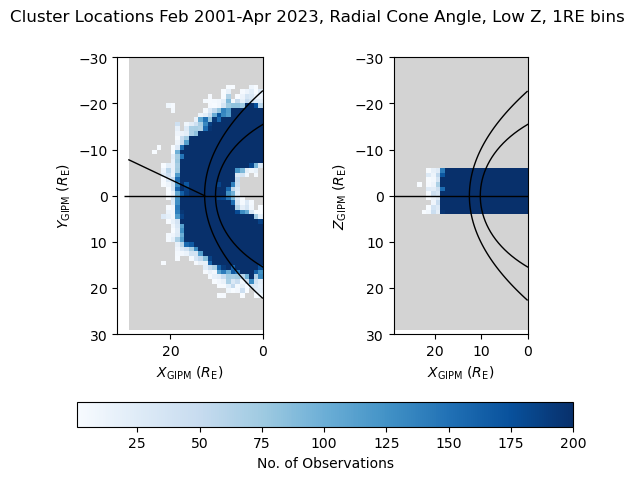

In [20]:
histo_plot(HistXY_rad, HistXZ_rad, XMA_all, xedg, yedg, zedg, 'Cluster Locations Feb 2001-Apr 2023, Radial Cone Angle, Low Z, 1RE bins',15)

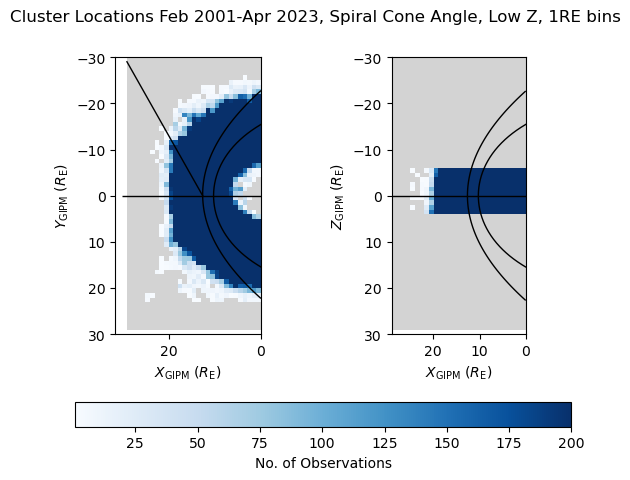

In [21]:
histo_plot(HistXY_spir, HistXZ_spir, XMA_all, xedg, yedg, zedg,'Cluster Locations Feb 2001-Apr 2023, Spiral Cone Angle, Low Z, 1RE bins',45)

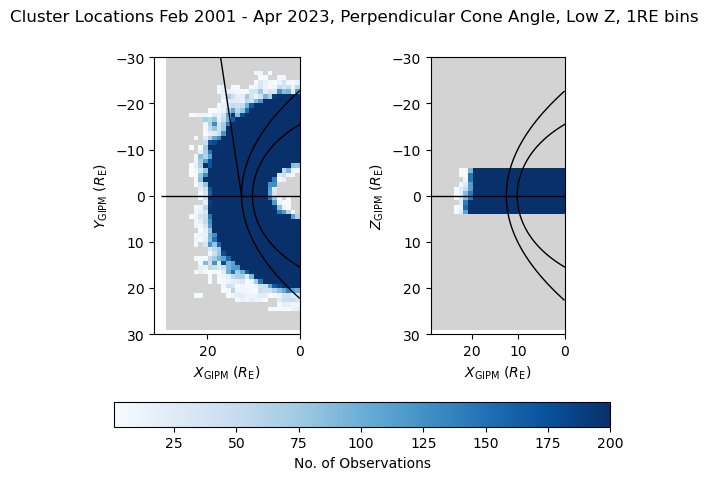

In [22]:
histo_plot(HistXY_perp, HistXZ_perp, XMA_all, xedg, yedg, zedg, 'Cluster Locations Feb 2001 - Apr 2023, Perpendicular Cone Angle, Low Z, 1RE bins',75)

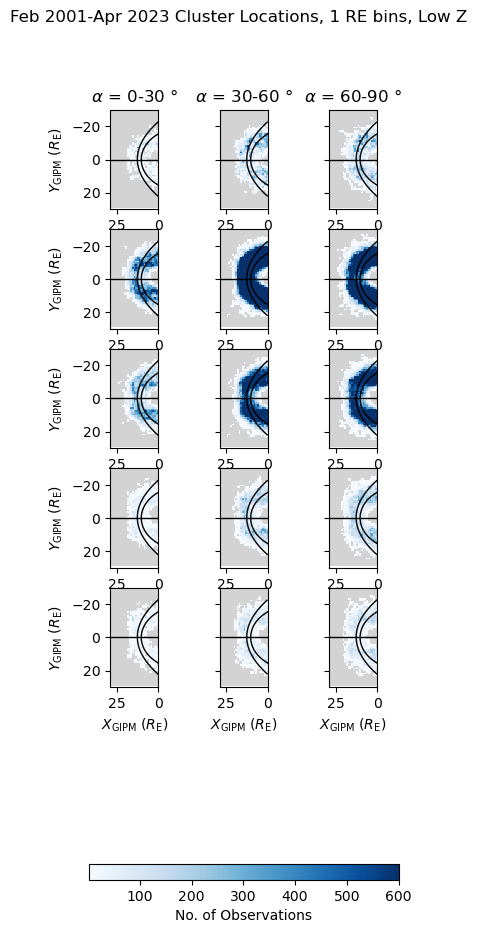

In [23]:
#histo plot function

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#tan_angle = np.tan(np.deg2rad(angle))

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(4, 10), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(5, 3, sharey=True)
subfigs.suptitle('Feb 2001-Apr 2023 Cluster Locations, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
#cmap = matplotlib.colormaps.get_cmap('Blues') 
#cmap.set_bad(color='lightgrey')
im = ax0.imshow(np.flipud(HistXY_rad_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_rad_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_rad_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_rad_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4,0]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_rad_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()

###########SPIRAL############################

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')

ax5.set_aspect('equal')
#ax5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax5.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax5.imshow(np.flipud(HistXY_spir_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax5.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-60 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax6.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax6.imshow(np.flipud(HistXY_spir_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax6.set_ylim(-30,30)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax7.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax7.imshow(np.flipud(HistXY_spir_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax7.set_ylim(-30,30)
ax7.invert_xaxis()
ax7.invert_yaxis()

ax8 = axsLeft[3,1]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')
ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax8.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax8.imshow(np.flipud(HistXY_spir_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax8.set_ylim(-30,30)
ax8.invert_xaxis()
ax8.invert_yaxis()

ax9 = axsLeft[4,1]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax9.imshow(np.flipud(HistXY_spir_15more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax9.set_ylim(-30,30)
ax9.invert_xaxis()
ax9.invert_yaxis()

######PERPENDICULAR

ax10 = axsLeft[0,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')

ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax10.set_title(r'$\alpha$ = 60-90 $\degree$')

ax10.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax10.imshow(np.flipud(HistXY_perp_less7), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax10.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[1,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax11.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax11.imshow(np.flipud(HistXY_perp_7_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax11.set_ylim(-30,30)
ax11.invert_xaxis()
ax11.invert_yaxis()

ax12 = axsLeft[2,2]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')
ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax12.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax12.imshow(np.flipud(HistXY_perp_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax12.set_ylim(-30,30)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[3,2]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax13.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax13.imshow(np.flipud(HistXY_perp_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax13.set_ylim(-30,30)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[4,2]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax14.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax14.imshow(np.flipud(HistXY_perp_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax14.set_ylim(-30,30)
ax14.invert_xaxis()
ax14.invert_yaxis()


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

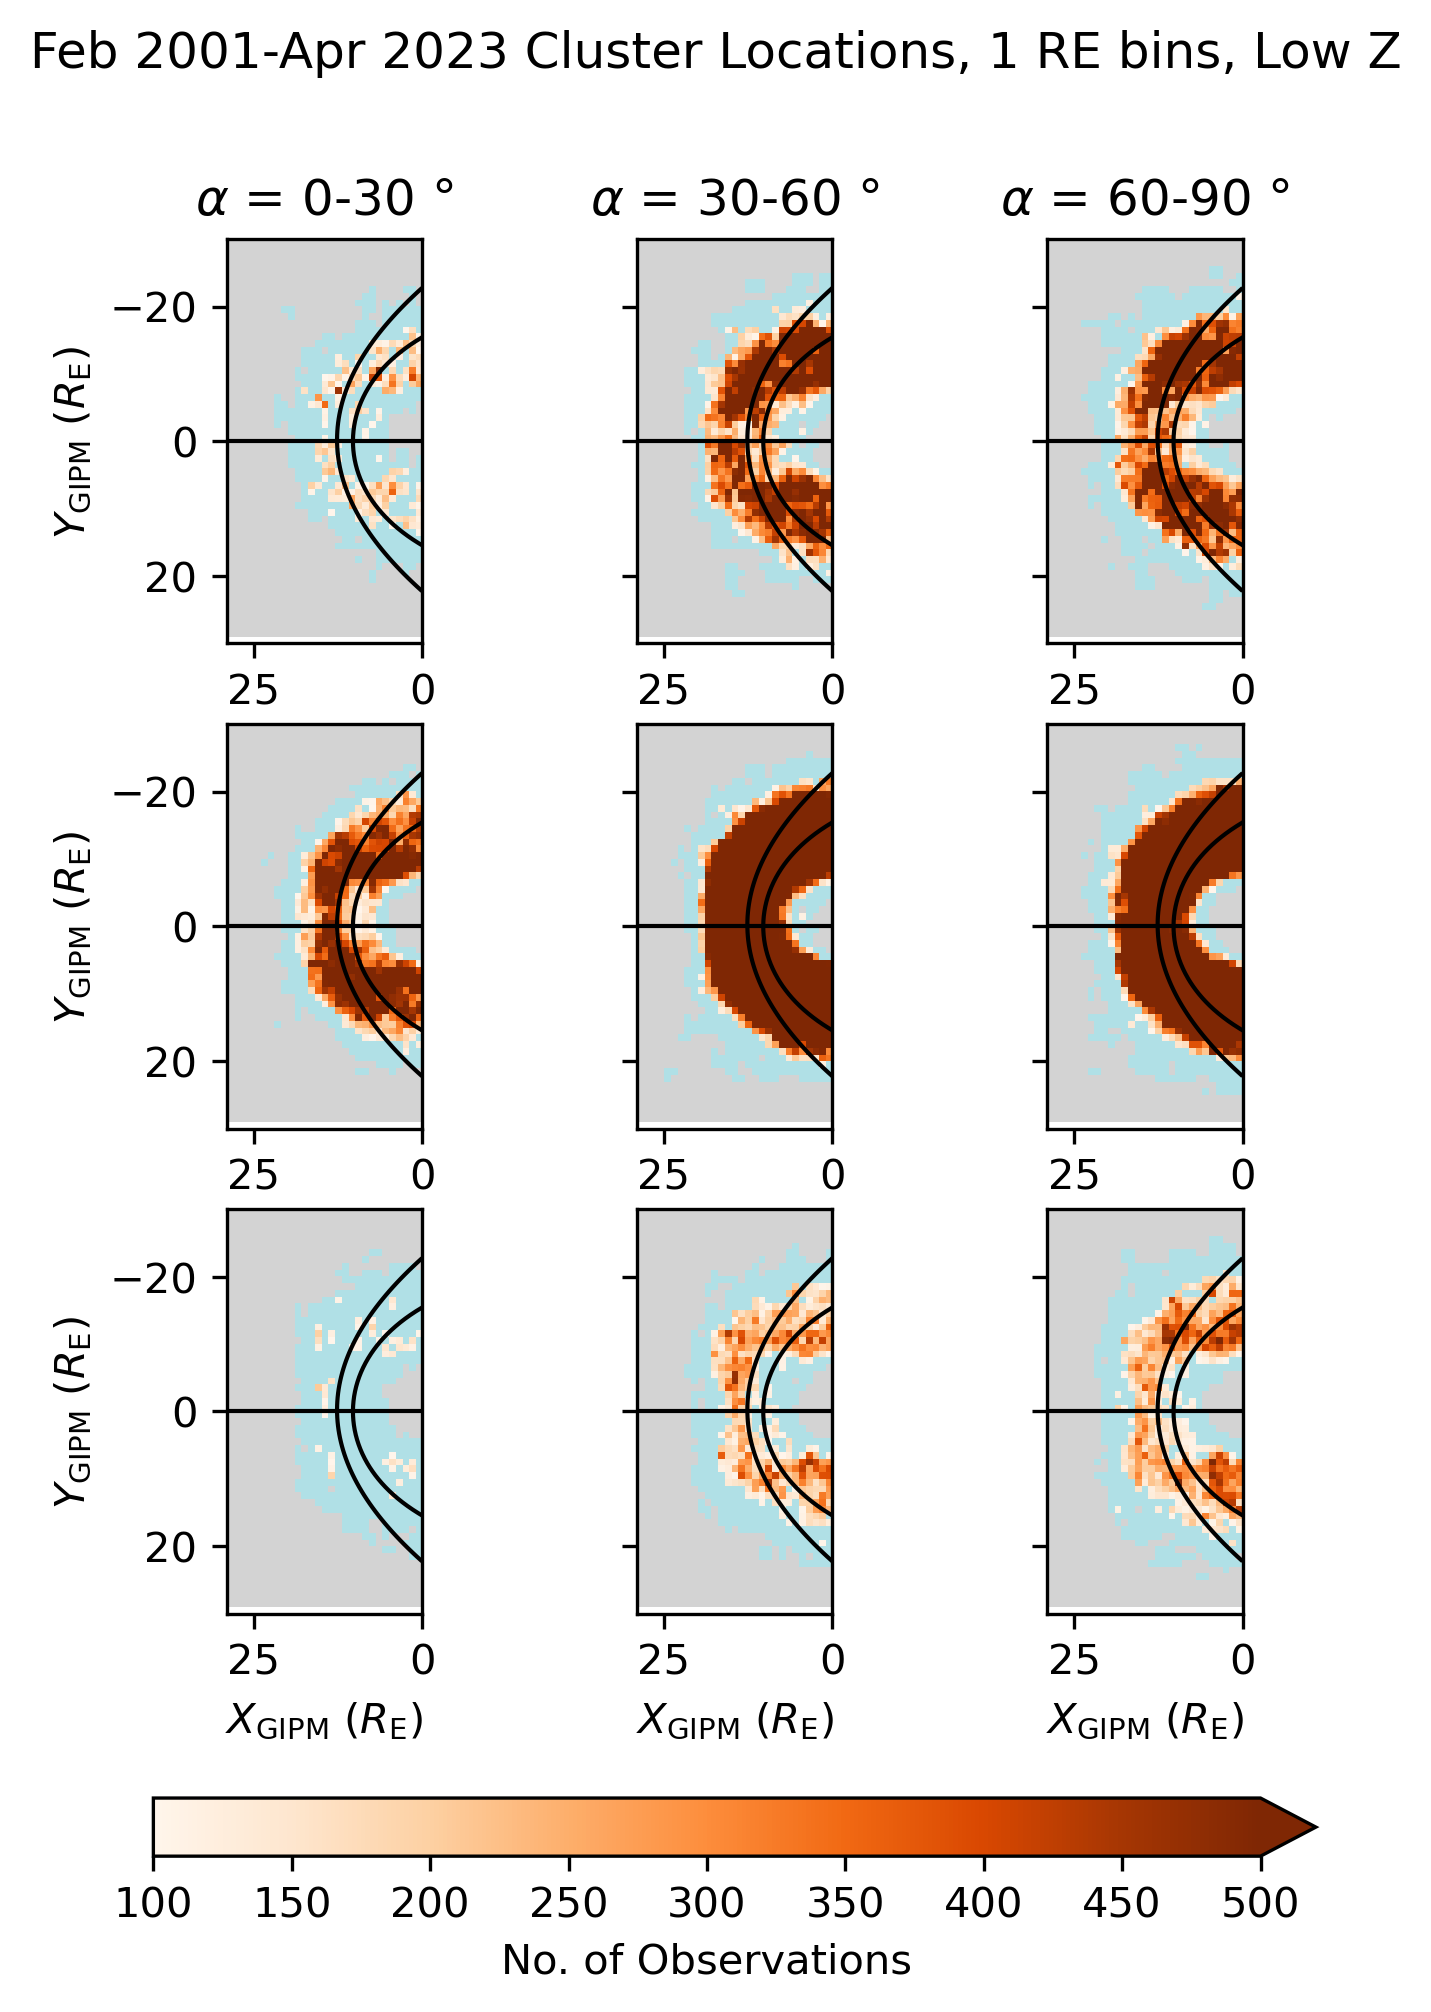

In [37]:
#histo plot function, 3x3

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#tan_angle = np.tan(np.deg2rad(angle))

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(5, 7), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 3, sharey=True)
subfigs.suptitle('Feb 2001-Apr 2023 Cluster Locations, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
#cmap = matplotlib.colormaps.get_cmap('Blues') 
#cmap.set_bad(color='lightgrey')
im = ax0.imshow(np.flipud(HistXY_rad_less7), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='max', label='No. of Observations')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_rad_7_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_rad_15more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########SPIRAL############################

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')

ax5.set_aspect('equal')
#ax5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax5.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax5.imshow(np.flipud(HistXY_spir_less7), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax5.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-60 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax6.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax6.imshow(np.flipud(HistXY_spir_7_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax6.set_ylim(-30,30)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax7.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax7.imshow(np.flipud(HistXY_spir_15more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax7.set_ylim(-30,30)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######PERPENDICULAR

ax10 = axsLeft[0,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')

ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax10.set_title(r'$\alpha$ = 60-90 $\degree$')

ax10.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax10.imshow(np.flipud(HistXY_perp_less7), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax10.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[1,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax11.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax11.imshow(np.flipud(HistXY_perp_7_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax11.set_ylim(-30,30)
ax11.invert_xaxis()
ax11.invert_yaxis()

ax12 = axsLeft[2,2]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')
ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax12.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax12.imshow(np.flipud(HistXY_perp_15more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax12.set_ylim(-30,30)
ax12.invert_xaxis()
ax12.invert_yaxis()
ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

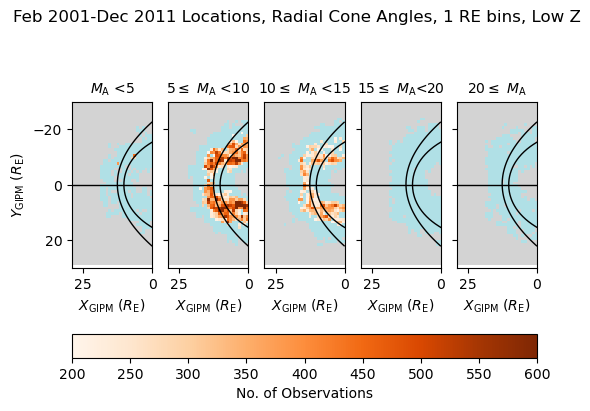

In [36]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle('Feb 2001-Dec 2011 Locations, Radial Cone Angles, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_rad_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_rad_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_rad_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_rad_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_rad_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


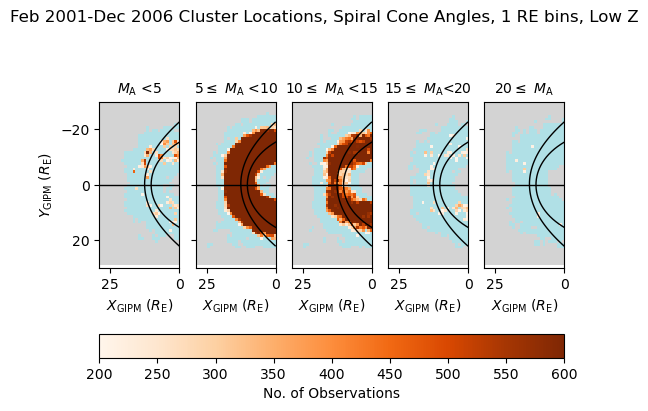

In [17]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle('Feb 2001-Dec 2006 Cluster Locations, Spiral Cone Angles, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_spir_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_spir_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_spir_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_spir_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_spir_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


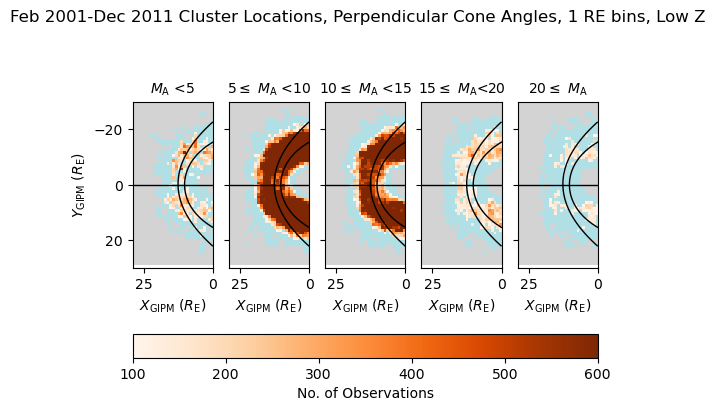

In [18]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle('Feb 2001-Apr 2023 Cluster Locations, Perpendicular Cone Angles, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_perp_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 100, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_perp_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 100, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_perp_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 100, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_perp_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 100, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_perp_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 100, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [19]:
df_spiral_low = cl_all.loc[(cl_all['cone angle'] >= 30) & (cl_all['cone angle'] < 45) & (cl_all['GIPM X'].notnull())]
df_spiral_high = cl_all.loc[(cl_all['cone angle'] >= 45) & (cl_all['cone angle'] < 60) & (cl_all['GIPM X'].notnull())]

df_spir_low_lowZ = df_spiral_low.loc[(df_spiral_low['GIPM Z'] < 5) & (df_spiral_low['GIPM Z'] > -5)]
df_spir_high_lowZ = df_spiral_high.loc[(df_spiral_high['GIPM Z'] < 5) & (df_spiral_high['GIPM Z'] > -5)]

#spiral 

df_spir_low_less5 = df_spir_low_lowZ.loc[(df_spir_low_lowZ['MA'] < 5)]
df_spir_low_5_10 = df_spir_low_lowZ.loc[((df_spir_low_lowZ['MA'] >= 5) & df_spir_low_lowZ['MA'] < 10)]
df_spir_low_10_15 = df_spir_low_lowZ.loc[(df_spir_low_lowZ['MA'] >= 10) & (df_spir_low_lowZ['MA'] < 15)]
df_spir_low_15_20 = df_spir_low_lowZ.loc[(df_spir_low_lowZ['MA'] >= 15) & (df_spir_low_lowZ['MA'] < 20)]
df_spir_low_20more = df_spir_low_lowZ.loc[(df_spir_low_lowZ['MA'] >= 20)]

#spiral 

df_spir_high_less5 = df_spir_high_lowZ.loc[(df_spir_high_lowZ['MA'] < 5)]
df_spir_high_5_10 = df_spir_high_lowZ.loc[((df_spir_high_lowZ['MA'] >= 5) & df_spir_high_lowZ['MA'] < 10)]
df_spir_high_10_15 = df_spir_high_lowZ.loc[(df_spir_high_lowZ['MA'] >= 10) & (df_spir_high_lowZ['MA'] < 15)]
df_spir_high_15_20 = df_spir_high_lowZ.loc[(df_spir_high_lowZ['MA'] >= 15) & (df_spir_high_lowZ['MA'] < 20)]
df_spir_high_20more = df_spir_high_lowZ.loc[(df_spir_high_lowZ['MA'] >= 20)]


KeyError: 'MA'

In [ ]:
###LOW SPIRAL
###BELOW 5MA

x_locs_spir_low_less5 = df_spir_low_less5['GIPM X (RE)'].to_numpy()
y_locs_spir_low_less5 = df_spir_low_less5['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_less5, xedg, yedg = np.histogram2d(x_locs_spir_low_less5, y_locs_spir_low_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_low_less5 = HistXY_spir_low_less5.T

###5-10 MA

x_locs_spir_low_5_10 = df_spir_low_5_10['GIPM X (RE)'].to_numpy()
y_locs_spir_low_5_10 = df_spir_low_5_10['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_5_10, xedg, zedg = np.histogram2d(x_locs_spir_low_5_10, y_locs_spir_low_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_low_5_10 = HistXY_spir_low_5_10.T

###10-15MA

x_locs_spir_low_10_15 = df_spir_low_10_15['GIPM X (RE)'].to_numpy()
y_locs_spir_low_10_15 = df_spir_low_10_15['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_10_15, xedg, yedg = np.histogram2d(x_locs_spir_low_10_15, y_locs_spir_low_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_low_10_15 = HistXY_spir_low_10_15.T

###15-20MA
x_locs_spir_low_15_20 = df_spir_low_15_20['GIPM X (RE)'].to_numpy()
y_locs_spir_low_15_20 = df_spir_low_15_20['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_15_20, xedg, zedg = np.histogram2d(x_locs_spir_low_15_20, y_locs_spir_low_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_spir_low_15_20 = HistXY_spir_low_15_20.T

###OVER 20MA
x_locs_spir_low_20more = df_spir_low_20more['GIPM X (RE)'].to_numpy()
y_locs_spir_low_20more = df_spir_low_20more['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_20more, xedg, yedg = np.histogram2d(x_locs_spir_low_20more, y_locs_spir_low_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_low_20more = HistXY_spir_low_20more.T

HistXY_spir_low_less5[HistXY_spir_low_less5 == 0] = np.nan
HistXY_spir_low_5_10[HistXY_spir_low_5_10 == 0] = np.nan
HistXY_spir_low_10_15[HistXY_spir_low_10_15 == 0] = np.nan
HistXY_spir_low_15_20[HistXY_spir_low_15_20 == 0] = np.nan
HistXY_spir_low_20more[HistXY_spir_low_20more == 0] = np.nan

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle(r'23 Years Cluster Locations, $\alpha$ = 30-45 $\degree$, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_spir_low_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_spir_low_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_spir_low_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_spir_low_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_spir_low_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [ ]:
###LOW SPIRAL
###BELOW 5MA

x_locs_spir_high_less5 = df_spir_high_less5['GIPM X (RE)'].to_numpy()
y_locs_spir_high_less5 = df_spir_high_less5['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_less5, xedg, yedg = np.histogram2d(x_locs_spir_high_less5, y_locs_spir_high_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_high_less5 = HistXY_spir_high_less5.T

###5-10 MA

x_locs_spir_high_5_10 = df_spir_high_5_10['GIPM X (RE)'].to_numpy()
y_locs_spir_high_5_10 = df_spir_high_5_10['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_5_10, xedg, zedg = np.histogram2d(x_locs_spir_high_5_10, y_locs_spir_high_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_high_5_10 = HistXY_spir_high_5_10.T

###10-15MA

x_locs_spir_high_10_15 = df_spir_high_10_15['GIPM X (RE)'].to_numpy()
y_locs_spir_high_10_15 = df_spir_high_10_15['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_10_15, xedg, yedg = np.histogram2d(x_locs_spir_high_10_15, y_locs_spir_high_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_high_10_15 = HistXY_spir_high_10_15.T

###15-20MA
x_locs_spir_high_15_20 = df_spir_high_15_20['GIPM X (RE)'].to_numpy()
y_locs_spir_high_15_20 = df_spir_high_15_20['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_15_20, xedg, zedg = np.histogram2d(x_locs_spir_high_15_20, y_locs_spir_high_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_spir_high_15_20 = HistXY_spir_high_15_20.T

###OVER 20MA
x_locs_spir_high_20more = df_spir_high_20more['GIPM X (RE)'].to_numpy()
y_locs_spir_high_20more = df_spir_high_20more['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_20more, xedg, yedg = np.histogram2d(x_locs_spir_high_20more, y_locs_spir_high_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_high_20more = HistXY_spir_high_20more.T

HistXY_spir_high_less5[HistXY_spir_high_less5 == 0] = np.nan
HistXY_spir_high_5_10[HistXY_spir_high_5_10 == 0] = np.nan
HistXY_spir_high_10_15[HistXY_spir_high_10_15 == 0] = np.nan
HistXY_spir_high_15_20[HistXY_spir_high_15_20 == 0] = np.nan
HistXY_spir_high_20more[HistXY_spir_high_20more == 0] = np.nan

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle(r'23 Years Cluster Locations, $\alpha$ = 45-60 $\degree$, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_spir_high_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_spir_high_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_spir_high_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_spir_high_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_spir_high_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [ ]:
df_perpendicular_low = cl_all.loc[(cl_all['cone angle'] >= 60) & (cl_all['cone angle'] < 75) & (cl_all['GIPM X (RE)'].notnull())]
df_perpendicular_high = cl_all.loc[(cl_all['cone angle'] >= 75) & (cl_all['cone angle'] < 90) & (cl_all['GIPM X (RE)'].notnull())]

df_perp_low_lowZ = df_perpendicular_low.loc[(df_perpendicular_low['GIPM Z (RE)'] < 5) & (df_perpendicular_low['GIPM Z (RE)'] > -5)]
df_perp_high_lowZ = df_perpendicular_high.loc[(df_perpendicular_high['GIPM Z (RE)'] < 5) & (df_perpendicular_high['GIPM Z (RE)'] > -5)]

#perpendicular 

df_perp_low_less5 = df_perp_low_lowZ.loc[(df_perp_low_lowZ['MA'] < 5)]
df_perp_low_5_10 = df_perp_low_lowZ.loc[((df_perp_low_lowZ['MA'] >= 5) & df_perp_low_lowZ['MA'] < 10)]
df_perp_low_10_15 = df_perp_low_lowZ.loc[(df_perp_low_lowZ['MA'] >= 10) & (df_perp_low_lowZ['MA'] < 15)]
df_perp_low_15_20 = df_perp_low_lowZ.loc[(df_perp_low_lowZ['MA'] >= 15) & (df_perp_low_lowZ['MA'] < 20)]
df_perp_low_20more = df_perp_low_lowZ.loc[(df_perp_low_lowZ['MA'] >= 20)]

#high

df_perp_high_less5 = df_perp_high_lowZ.loc[(df_perp_high_lowZ['MA'] < 5)]
df_perp_high_5_10 = df_perp_high_lowZ.loc[((df_perp_high_lowZ['MA'] >= 5) & df_perp_high_lowZ['MA'] < 10)]
df_perp_high_10_15 = df_perp_high_lowZ.loc[(df_perp_high_lowZ['MA'] >= 10) & (df_perp_high_lowZ['MA'] < 15)]
df_perp_high_15_20 = df_perp_high_lowZ.loc[(df_perp_high_lowZ['MA'] >= 15) & (df_perp_high_lowZ['MA'] < 20)]
df_perp_high_20more = df_perp_high_lowZ.loc[(df_perp_high_lowZ['MA'] >= 20)]


In [ ]:
###LOW perp
###BELOW 5MA

x_locs_perp_low_less5 = df_perp_low_less5['GIPM X (RE)'].to_numpy()
y_locs_perp_low_less5 = df_perp_low_less5['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_less5, xedg, yedg = np.histogram2d(x_locs_perp_low_less5, y_locs_perp_low_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_low_less5 = HistXY_perp_low_less5.T

###5-10 MA

x_locs_perp_low_5_10 = df_perp_low_5_10['GIPM X (RE)'].to_numpy()
y_locs_perp_low_5_10 = df_perp_low_5_10['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_5_10, xedg, zedg = np.histogram2d(x_locs_perp_low_5_10, y_locs_perp_low_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_low_5_10 = HistXY_perp_low_5_10.T

###10-15MA

x_locs_perp_low_10_15 = df_perp_low_10_15['GIPM X (RE)'].to_numpy()
y_locs_perp_low_10_15 = df_perp_low_10_15['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_10_15, xedg, yedg = np.histogram2d(x_locs_perp_low_10_15, y_locs_perp_low_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_low_10_15 = HistXY_perp_low_10_15.T

###15-20MA
x_locs_perp_low_15_20 = df_perp_low_15_20['GIPM X (RE)'].to_numpy()
y_locs_perp_low_15_20 = df_perp_low_15_20['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_15_20, xedg, zedg = np.histogram2d(x_locs_perp_low_15_20, y_locs_perp_low_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_perp_low_15_20 = HistXY_perp_low_15_20.T

###OVER 20MA
x_locs_perp_low_20more = df_perp_low_20more['GIPM X (RE)'].to_numpy()
y_locs_perp_low_20more = df_perp_low_20more['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_20more, xedg, yedg = np.histogram2d(x_locs_perp_low_20more, y_locs_perp_low_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_low_20more = HistXY_perp_low_20more.T

HistXY_perp_low_less5[HistXY_perp_low_less5 == 0] = np.nan
HistXY_perp_low_5_10[HistXY_perp_low_5_10 == 0] = np.nan
HistXY_perp_low_10_15[HistXY_perp_low_10_15 == 0] = np.nan
HistXY_perp_low_15_20[HistXY_perp_low_15_20 == 0] = np.nan
HistXY_perp_low_20more[HistXY_perp_low_20more == 0] = np.nan

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle(r'23 Years Cluster Locations, $\alpha$ = 60-75 $\degree$, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_perp_low_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_perp_low_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_perp_low_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_perp_low_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_perp_low_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [ ]:
###High perp
###BELOW 5MA

x_locs_perp_high_less5 = df_perp_high_less5['GIPM X (RE)'].to_numpy()
y_locs_perp_high_less5 = df_perp_high_less5['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_less5, xedg, yedg = np.histogram2d(x_locs_perp_high_less5, y_locs_perp_high_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_high_less5 = HistXY_perp_high_less5.T

###5-10 MA

x_locs_perp_high_5_10 = df_perp_high_5_10['GIPM X (RE)'].to_numpy()
y_locs_perp_high_5_10 = df_perp_high_5_10['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_5_10, xedg, zedg = np.histogram2d(x_locs_perp_high_5_10, y_locs_perp_high_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_high_5_10 = HistXY_perp_high_5_10.T

###10-15MA

x_locs_perp_high_10_15 = df_perp_high_10_15['GIPM X (RE)'].to_numpy()
y_locs_perp_high_10_15 = df_perp_high_10_15['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_10_15, xedg, yedg = np.histogram2d(x_locs_perp_high_10_15, y_locs_perp_high_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_high_10_15 = HistXY_perp_high_10_15.T

###15-20MA
x_locs_perp_high_15_20 = df_perp_high_15_20['GIPM X (RE)'].to_numpy()
y_locs_perp_high_15_20 = df_perp_high_15_20['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_15_20, xedg, zedg = np.histogram2d(x_locs_perp_high_15_20, y_locs_perp_high_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_perp_high_15_20 = HistXY_perp_high_15_20.T

###OVER 20MA
x_locs_perp_high_20more = df_perp_high_20more['GIPM X (RE)'].to_numpy()
y_locs_perp_high_20more = df_perp_high_20more['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_20more, xedg, yedg = np.histogram2d(x_locs_perp_high_20more, y_locs_perp_high_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_high_20more = HistXY_perp_high_20more.T

HistXY_perp_high_less5[HistXY_perp_high_less5 == 0] = np.nan
HistXY_perp_high_5_10[HistXY_perp_high_5_10 == 0] = np.nan
HistXY_perp_high_10_15[HistXY_perp_high_10_15 == 0] = np.nan
HistXY_perp_high_15_20[HistXY_perp_high_15_20 == 0] = np.nan
HistXY_perp_high_20more[HistXY_perp_high_20more == 0] = np.nan

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle(r'23 Years Cluster Locations, $\alpha$ = 75-90 $\degree$, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_perp_high_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_perp_high_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_perp_high_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_perp_high_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_perp_high_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [42]:
#BINNING SCRIPT


def bin_lister(cluster_df, bin_size):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z']> -5) & (cluster_df['GIPM Z'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??

    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X']>= X_lb) & (cluster_df_XY['GIPM X'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y']>= Y_lb) & (mask['GIPM Y'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_ratio_perbin = []

    for j in bin_lists:
        #intermediate list for taking mean
        int_list = []
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            b_rat = mask['B mean']
            int_list.extend(b_rat)
        
        if len(int_list) != 0:
            mean_mean_rat = sum(int_list)/len(int_list)
            mean_ratio_perbin.append(mean_mean_rat)
        
        else:
            mean_ratio_perbin.append(np.nan)
        
    return(mean_ratio_perbin)


In [43]:
#plotting function

def binned_plot(rad_list, spir_list, perp_list, bin_size):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle_0 = np.tan(np.deg2rad(15))
    tan_angle_1 = np.tan(np.deg2rad(45))
    tan_angle_2 = np.tan(np.deg2rad(75))

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))


    ###################
    fig = plt.figure(figsize=(8, 6.5))
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(1, 3, sharey=False)
    #gs = gridspec.GridSpec(2, 2)
    subfigs.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, Feb 2001-Apr 2023,GIPM')

    #RADIAL

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(rad_list)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0 = axsLeft[0]
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'$\alpha$ = 0-30$\degree$')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_0)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    ax0.set_ylim(-30,30)
    ax0.set_xlim(0,25)
    ax0.invert_xaxis()
    ax0.invert_yaxis()


    ax1 = axsLeft[1]

    #SPIRAL
    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_1)

    #want to also have line for just solar wind flow along y=0


    col_array_1 = np.array(spir_list)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    ax1.set_aspect('equal')
    ax1.set_title(r'$\alpha$ = 30-60$\degree$')
    ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylim(-30,30)
    ax1.set_xlim(0,25)
    ax1.invert_xaxis()
    ax1.invert_yaxis()

    #fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=ax1)

    #PERP

    col_array_2 = np.array(perp_list)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2 = axsLeft[2]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_2)

    #want to also have line for just solar wind flow along y=0

    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    ax2.set_title(r'$\alpha$ = 60-90$\degree$')
    ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylim(-30,30)
    ax2.set_xlim(0,25)
    ax2.invert_xaxis()
    ax2.invert_yaxis()

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.2, ax=axsLeft, label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #colorbar = subfigs.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=axsLeft, location='bottom', label='Bcluster/Bomni')
    plt.subplots_adjust(wspace=0.5, hspace=0.1, top=0.95, bottom=0.2)
    
    filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    plt.savefig(filename, format='png', dpi = 300)

    #plt.show()


In [ ]:
%%time
mean_rat_rad = bin_lister(df_radial, 1)

In [ ]:
mean_rat_spir = bin_lister(df_spiral, 1)

In [ ]:
mean_rat_perp = bin_lister(df_perpendicular, 1)

In [ ]:
binned_plot(mean_rat_rad, mean_rat_spir, mean_rat_perp, 1)

In [ ]:
#plotting function but now with location marked on!

def binned_plot_new(rad_list, spir_list, perp_list, bin_size):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle_0 = np.tan(np.deg2rad(15))
    tan_angle_1 = np.tan(np.deg2rad(45))
    tan_angle_2 = np.tan(np.deg2rad(75))

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))


    ###################
    fig = plt.figure(figsize=(8, 6.5))
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots()
    #gs = gridspec.GridSpec(2, 2)
    #subfigs.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, Feb 2001- Feb 2002, GIPM')
    
    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]
    
    #SPIRAL
    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_1)

    #want to also have line for just solar wind flow along y=0

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_1 = np.array(spir_list)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(44/bin_size)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    #axsLeft.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    #axsLeft.hlines(y=-17, xmin= 0, xmax=25, linewidth=1, color='k')
    #axsLeft.hlines(y=-22, xmin= 0, xmax=25, linewidth=1, color='k')
    #axsLeft.hlines(y=21, xmin= 0, xmax=25, linewidth=1, color='k')
    #axsLeft.vlines(x=22, ymin= -30, ymax=30, linewidth=1, color='k')
    #axsLeft.vlines(x=8, ymin= -30, ymax=30, linewidth=1, color='k')
    #axsLeft.vlines(x=22, ymin= -30, ymax=30, linewidth=1, color='k')
    axsLeft.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    axsLeft.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    axsLeft.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    axsLeft.plot(X_shue, R_shue, linewidth=1, color='k')
    
    point_1_x = 13.639599
    point_1_y = 6.674160
    point_2_x = 13.920685
    point_2_y = -6.178362
    point_3_x = 13.545670
    point_3_y = -6.837534
    point_4_x = 12.205462
    point_4_y = -8.049636
    point_5_x = 12.142737
    point_5_y = -10.166719
    point_6_x = 12.132900
    point_6_y = -13.019620
    point_7_x = 11.649001
    point_7_y = -14.410725
    point_8_x = 10.103807
    point_8_y = -14.204252
    point_9_x = 6.232392
    point_9_y = -17.029604
    point_10_x = 8.09
    point_10_y = -16.28
    point_11_x = 9.55
    point_11_y = 14.07
    point_12_x = 13.72
    point_12_y = 8.00
    point_13_x = 13.72
    point_13_y = 8.00
    point_14_x = 11.83
    point_14_y = 9.43
    point_15_x = 11.62
    point_15_y = -12.42
    #axsLeft.scatter(point_15_x, point_15_y, marker="o", c="green", s=60)

    axsLeft.set_aspect('equal')
    axsLeft.set_title(r'Feb 2001 - Apr 2023 $\alpha$ = 30-60$\degree$')
    axsLeft.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    axsLeft.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    axsLeft.set_ylim(-30,30)
    axsLeft.set_xlim(0,25)
    axsLeft.invert_xaxis()
    axsLeft.invert_yaxis()

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=axsLeft)

    #plt.show()


In [ ]:
binned_plot_new(mean_rat_rad, mean_rat_spir, mean_rat_perp, 1)